In [1]:
import tensorflow as tf
tf.__version__


'2.5.0'

In [2]:
import keras


In [3]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                shear_range=0.2,
                                                                zoom_range=0.2,
                                                                horizontal_flip=True)
training_set = train_datagen.flow_from_directory('train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')


Found 181 images belonging to 2 classes.


In [4]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('test',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')


Found 46 images belonging to 2 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [8]:
model.add(MaxPool2D(pool_size=2, strides=2))

In [9]:
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))


In [10]:
model.add(MaxPool2D(pool_size=2, strides=2))

In [11]:
model.add(Flatten())

In [12]:
model.add(Dense(units=128, activation='relu'))

In [13]:
model.add(Dense(units=1, activation='sigmoid'))

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(x=training_set, validation_data=test_set, epochs=50, verbose=1)

Epoch 1/50
6/6 [==============================] - 14s 2s/step - loss: 0.7341 - accuracy: 0.6685 - val_loss: 0.6179 - val_accuracy: 0.4565
Epoch 2/50
6/6 [==============================] - 5s 785ms/step - loss: 0.5463 - accuracy: 0.7293 - val_loss: 0.3665 - val_accuracy: 0.9783
Epoch 3/50
6/6 [==============================] - 4s 726ms/step - loss: 0.4002 - accuracy: 0.8785 - val_loss: 0.1868 - val_accuracy: 0.9783
Epoch 4/50
6/6 [==============================] - 5s 861ms/step - loss: 0.3671 - accuracy: 0.8343 - val_loss: 0.0840 - val_accuracy: 0.9783
Epoch 5/50
6/6 [==============================] - 5s 799ms/step - loss: 0.2637 - accuracy: 0.8895 - val_loss: 0.0844 - val_accuracy: 0.9783
Epoch 6/50
6/6 [==============================] - 4s 741ms/step - loss: 0.3031 - accuracy: 0.8619 - val_loss: 0.3526 - val_accuracy: 0.8913
Epoch 7/50
6/6 [==============================] - 5s 832ms/step - loss: 0.2204 - accuracy: 0.9006 - val_loss: 0.0992 - val_accuracy: 0.9783
Epoch 8/50
6/6 [======

<AxesSubplot:>

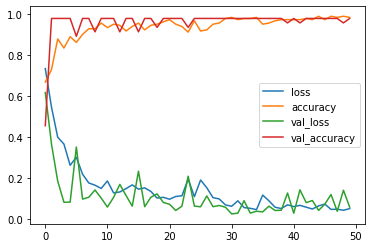

In [16]:
import pandas as pd
losses = pd.DataFrame(model.history.history)
losses.plot()


In [21]:
model.save('covid-19_classifier.h5')

In [22]:
from tensorflow.keras.models import load_model
model = load_model('covid-19_classifier.h5')

In [23]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from keras.preprocessing import image
img_path = 'test/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg'
test_image = image.load_img(img_path, target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict_classes(test_image / 255.0)
prediction = 'Positive' if result[0][0] == 0 else 'Negative'

Positive


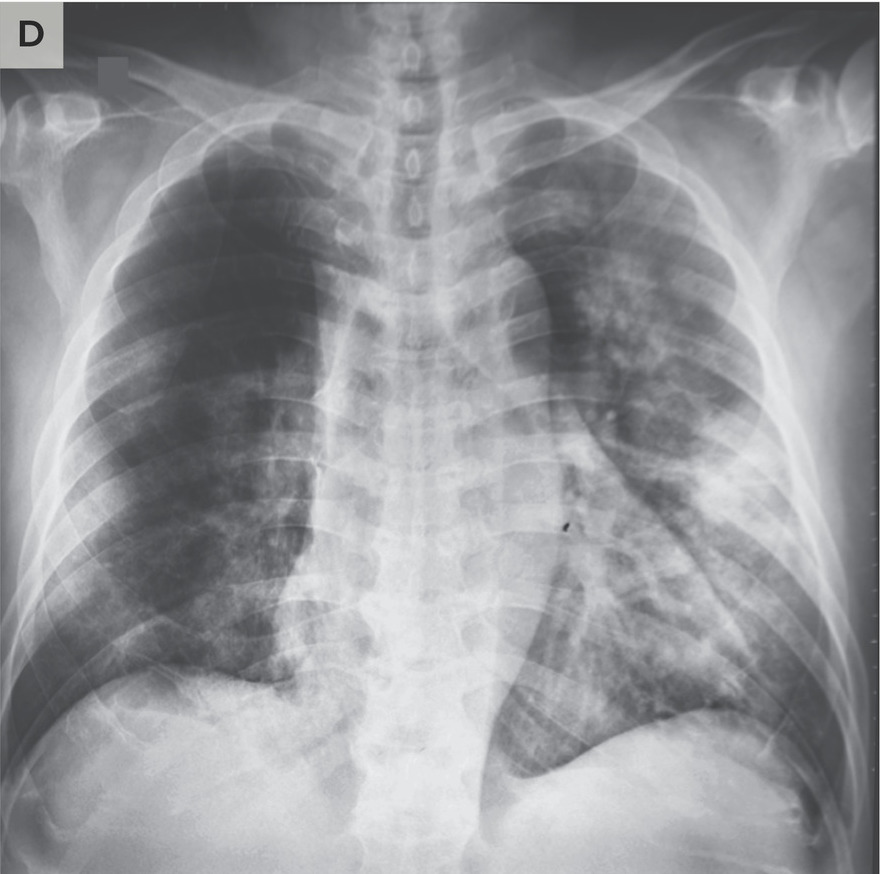

In [24]:
from IPython.display import Image
print(prediction)
Image(img_path)
